In [2]:
!pip install -q kaggle


In [3]:
from google.colab import files

files.upload()





Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anirudhragam19","key":"f5750430c16e8587588e2a5569998b0e"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivan118/healthcare-analytics                         AV : Healthcare Analytics                           2MB  2020-09-13 17:40:05           2415  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11           1739  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           3000  
Cornell-University/arxiv                               arXiv Dataset                                     889MB  2020-09-26 23:51:17           3208  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          

In [6]:
! mkdir traffic_dataset
! kaggle datasets download -d silicon99/dft-accident-data
! unzip dft-accident-data.zip -d traffic_dataset/

 87% 97.0M/112M [00:04<00:01, 14.5MB/s]
100% 112M/112M [00:04<00:00, 24.0MB/s] 
Archive:  dft-accident-data.zip
  inflating: traffic_dataset/Accidents0515.csv  
  inflating: traffic_dataset/Casualties0515.csv  
  inflating: traffic_dataset/Vehicles0515.csv  
  inflating: traffic_dataset/contextCSVs/Accident_Severity.csv  
  inflating: traffic_dataset/contextCSVs/Age_Band.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Class.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Severity.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Type.csv  
  inflating: traffic_dataset/contextCSVs/Day_of_Week.csv  
  inflating: traffic_dataset/contextCSVs/Journey_Purpose.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Control.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Detail.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Location.csv  
  inflating: traffic_dataset/contextCSVs/Light_Conditions.csv  
  inflating: traffic_dataset/contextCSVs/Local_Authori

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

num_missing_values = []
accidents = pd.read_csv('traffic_dataset/Accidents0515.csv')

#Finding out number of missing values in each of the columns

for cols in accidents.columns.tolist():
  count = accidents[cols].isna().sum()
  num_missing_values.append(count)
print(accidents.columns.tolist())
print(num_missing_values)





['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']
[0, 138, 138, 138, 138, 0, 0, 0, 0, 0, 0, 151, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 129471]


In [8]:
accidents.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


[2, 3, 1]
[6, 3, 2, 1, 7, 9]
[1332384, 262950, 36755, 119472, 18647, 10445]


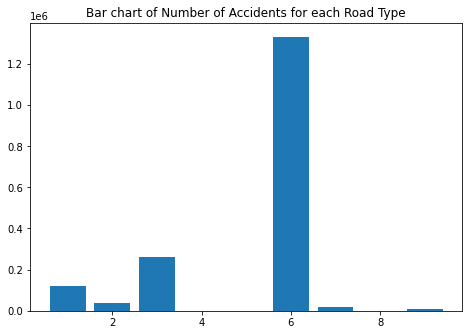

In [9]:
# Bar chart

road_conditions = accidents['Road_Type'].unique()
severity = accidents['Accident_Severity'].unique()

print(severity.tolist())
print(road_conditions.tolist())
num_counts = []

for i in road_conditions.tolist():
  df = accidents[accidents['Road_Type'] == i]
  num_rows = len(df)
  num_counts.append(num_rows)

print(num_counts)

#Plotting the bar chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(road_conditions.tolist(),num_counts)
ax.set_title('Bar chart of Number of Accidents for each Road Type')




plt.show()


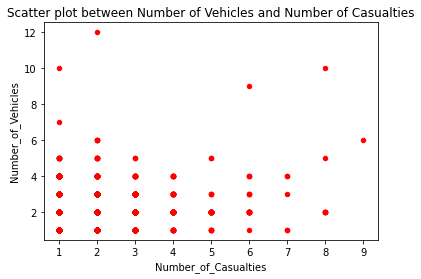

0.24328361087674746

In [10]:
# Scatter plots



# Taking a random sample of size 5000 from the dataset
# Sampling without replacement 

df = accidents.sample(5000,replace=False,axis=0)


df.plot.scatter(x='Number_of_Casualties', y='Number_of_Vehicles', title= "Scatter plot between Number of Vehicles and Number of Casualties",color='red')


plt.show()

df['Number_of_Casualties'].corr(df['Number_of_Vehicles'],method='pearson')



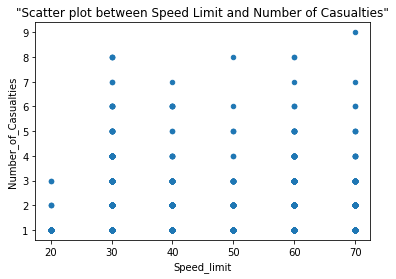

0.12498380030101933

In [11]:
df.plot.scatter(x='Speed_limit',y='Number_of_Casualties',title = '"Scatter plot between Speed Limit and Number of Casualties"')
plt.show()

df['Speed_limit'].corr(df['Number_of_Casualties'],method='pearson')

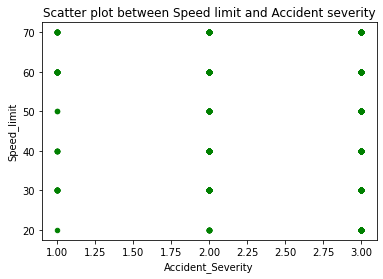

-0.08706182197488711

In [12]:
df.plot.scatter(x='Accident_Severity',y='Speed_limit',title = 'Scatter plot between Speed limit and Accident severity',color='green')
plt.show()

df['Accident_Severity'].corr(df['Speed_limit'],method='pearson')

In [13]:
accidents.corr(method='pearson')


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.417648,0.999354,-0.419572,-0.365724,0.016804,0.018631,-0.039181,-0.002487,-0.389522,-0.059439,-0.082217,-0.012543,-0.062934,0.028060,0.060689,0.046566,0.000852,-0.029164,0.056801,0.007785,-0.029148,-0.071576,-0.014964,-0.006440,-0.096213,0.008208
Location_Northing_OSGR,-0.417648,1.000000,-0.428506,0.999973,0.179699,-0.032726,-0.041665,0.030366,0.004000,0.131279,0.034038,0.041354,0.010760,0.048966,-0.013164,-0.048155,-0.032569,0.013882,0.045889,-0.007339,0.004842,0.020187,0.082494,0.015541,0.012402,0.051893,-0.011534
Longitude,0.999354,-0.428506,1.000000,-0.430328,-0.379239,0.017292,0.019916,-0.037904,-0.002495,-0.399809,-0.057912,-0.079970,-0.012460,-0.062146,0.027950,0.061611,0.047138,0.002373,-0.030409,0.055508,0.007424,-0.029170,-0.072340,-0.015126,-0.006901,-0.094593,0.008705
Latitude,-0.419572,0.999973,-0.430328,1.000000,0.177607,-0.032694,-0.041449,0.030522,0.003997,0.129523,0.034094,0.042248,0.010623,0.048667,-0.013045,-0.047921,-0.032287,0.014515,0.045840,-0.007235,0.004829,0.020117,0.082392,0.015483,0.012280,0.051384,-0.011359
Police_Force,-0.365724,0.179699,-0.379239,0.177607,1.000000,-0.036083,-0.016454,0.006230,0.000266,0.981568,0.044027,0.001366,-0.014581,0.196275,-0.094546,-0.110072,-0.116866,-0.018284,0.045247,-0.072108,0.019531,0.047123,0.081621,0.024313,0.028746,0.240343,-0.013635
Accident_Severity,0.016804,-0.032726,0.017292,-0.032694,-0.036083,1.000000,0.074930,-0.084122,0.002546,-0.036683,0.011923,-0.004717,-0.038998,-0.080647,0.045896,0.068979,0.064740,0.025432,0.004794,0.008163,-0.063286,0.021672,0.009437,0.001854,-0.000627,-0.083913,0.115559
Number_of_Vehicles,0.018631,-0.041665,0.019916,-0.041449,-0.016454,0.074930,1.000000,0.237059,-0.000199,-0.011394,-0.143016,-0.009895,-0.075624,0.084519,0.071101,0.078123,0.068383,0.024152,-0.017139,-0.048581,-0.084358,-0.020948,-0.041642,-0.011095,-0.045303,0.040443,-0.032014
Number_of_Casualties,-0.039181,0.030366,-0.037904,0.030522,0.006230,-0.084122,0.237059,1.000000,-0.000940,0.013551,-0.082939,0.007080,-0.011891,0.139207,-0.002348,-0.031749,-0.029537,0.001283,-0.007912,-0.028039,0.036736,-0.004546,0.028236,0.012384,0.003274,0.115781,-0.105511
Day_of_Week,-0.002487,0.004000,-0.002495,0.003997,0.000266,0.002546,-0.000199,-0.000940,1.000000,0.000177,0.007201,0.002459,0.005838,-0.016377,0.007643,0.005501,0.007304,0.000454,0.000646,0.007079,0.008001,-0.001579,-0.011014,-0.003156,-0.003721,-0.016741,0.004023
Local_Authority_(District),-0.389522,0.131279,-0.399809,0.129523,0.981568,-0.036683,-0.011394,0.013551,0.000177,1.000000,0.055198,0.011995,-0.015556,0.203047,-0.097934,-0.110492,-0.116680,-0.016592,0.040591,-0.084174,0.017920,0.049616,0.081119,0.024777,0.028449,0.253343,-0.009935
